# Python Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:

- [`Ground truth notebook`](https://github.com/mrdourke/python-deep-learning/blob/main/01_pytorch_workflow.ipynb)
- [`Book version of notebook`](https://www.learnpytorch.io/01_pytorch_workflow/)

In [11]:
what_we_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluting a model (inference)",
    5: "save and loading a model",
    6: "putting it all together"
}
what_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'save and loading a model',
 6: 'putting it all together'}

In [12]:
import torch
from torch import nn # nn contains all of PyTorch's building for neural networks

import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.7.0+cpu'

### 1. Data (Preparing and Loading)
Data can be almost anything.. in machine learning.

- Excel spreadsheet
- Image of any kind
- Videos (Youtube has lots of data)...
- DNA
- Text

Machine learning is game of two parts:
1. Get data into a numerical representaion.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **Parameters**

In [13]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start =0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(X), len(y)

(50, 50)

### Splitting  data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [15]:
# create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Building 

How might we better visualize our data ?
"Visualize, Visualize, Visualize "

In [16]:
def plot_predictions(train_data =X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels =y_test,
                     predictions =None
                     ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c="b", s=4, label 
    ="Training data")
    plt.scatter(test_data,test_labels, c="g", s=4, label 
    ="Test data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c='r',s=4, label ="Prediction")
    
    plt.legend(prop={"size":14})
    plt.show()

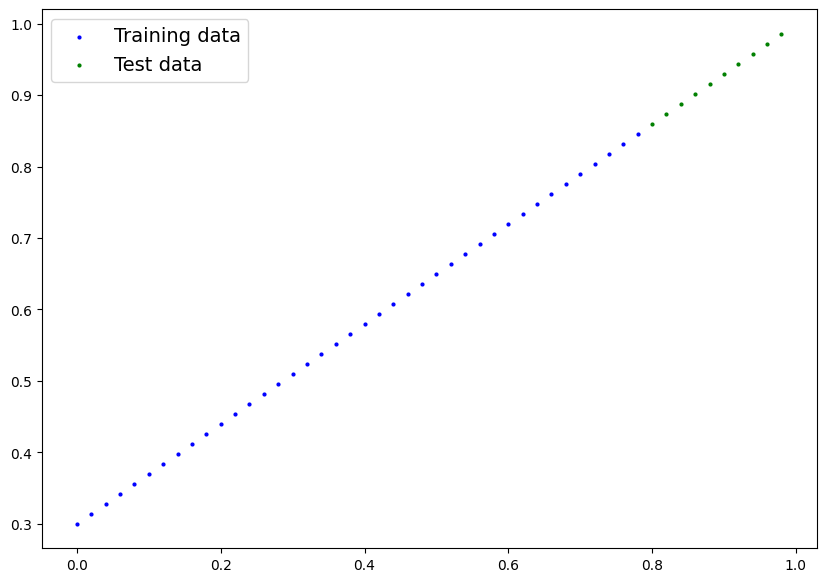

In [17]:
plot_predictions()

### Creating our first pytorch model for linear regression.
Our first pytorch model
this is very exciting... let's do it!
Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from [Real Python](https://realpython.com/python3-object-oriented-programming)

What our model does:
- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data).

How does it do so ?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [18]:
# creating a linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                        1,
                        requires_grad=True,
                        dtype=torch.float
                        ))

        self.bias = nn.Parameter(torch.randn(
                        1,
                        requires_grad=True,
                        dtype=torch.float,
                        ))
    
    # Forward method to define the computation in the model:
    def forward(self,x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights*x + self.bias # this is the linear regression formula

### Discussing some of the most important pyTorch Model Building Classes

PyTorch model building essentials
- `torch.nn` - contains all of the building blocks for computational graphs (a neural network can be considered as a computational graph)
- `torch.nn.Parameter` - what parameters should our model try and learn, often a pyTorch layer from torch.nn will these for us.
- `torch.nn.Module` - The base class for all neural network subclasses, if you should overwrite forward()
- `torch.optim` - this is used where the optimizers in PyTorch live, they will help with gradient descent
- `def forward()` - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation.
- `torch.utils.data.Dataset` - Represents a map between key (label) and sample (features) pairs of your data. Such as images and their associated labels.
- `torch.utils.data.Dataloader` - Creates a Python iterable over a torch Dataset (allows you to iterate over your data).

[Pytorch Cheat Sheet](https://docs.pytorch.org/tutorials/beginner/ptcheat.html)

### Checking the content of our PyTorch model

Now we've created a model, let's see what's inside...
So, we can check our model parameters or what's inside our model using `parameters()`.

In [21]:
# Creating a random seed
torch.manual_seed(42)

# Creating an instance of this model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
model_0.weights, model_0.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

### Making Predictions using model using `torch.inference_mode()`

To check our model's predictive power, let's see how well its practice **y_test** based on **x_test**.
When we pass the data through our model, it's going to run it through the **forward()** method.



In [24]:
# Make predictions with model:

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [25]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

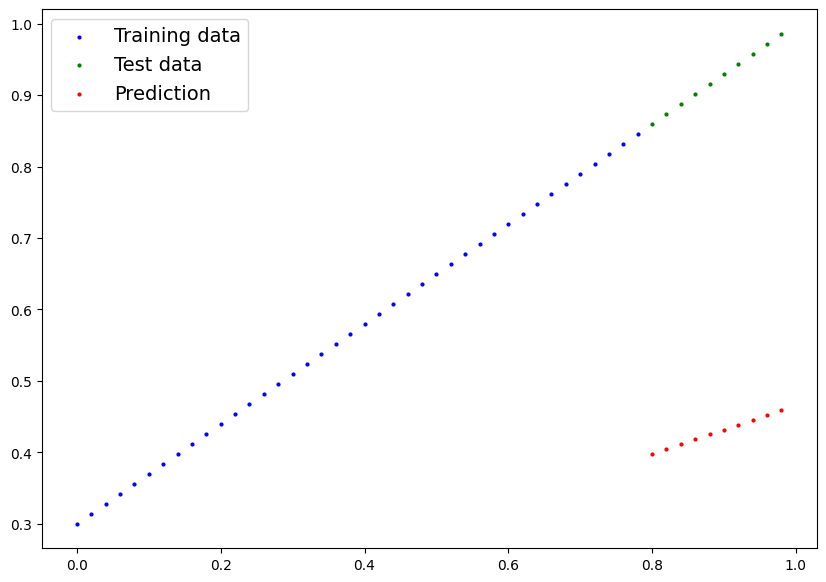

In [27]:
plot_predictions(predictions=y_preds)

### 3. Training model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters. 

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model prediction is use Loss Functions

- Note: Loss function may also be called as cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

- **Loss function:** A function to measure how wrong your model's prediction are to the ideal ouptuts, lower is better.

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg. weights & bias)

And specially for PyTorch, we need:
- A Training loop
- A Testing loop

### Loss Functions for Regression
- `nn.L1Loss`: Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y.
- `nn.L2Loss`: reates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.

There are other many loss functions for regression task but these two are most widely used.

### Loss Function for Classification 
- `nn.CrossEntropyLoss` - This criterion computes the cross entropy loss between input logits and target.
- `nn.BCELoss` - Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities:

In [ ]:
# Setup a loss function

loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)
# lr = learning rate - possibly the most important hyperparameter you can set. 

In [33]:
loss_fn 

L1Loss()